In [111]:
using Images

pic = load(raw"C:\Users\matthew\Pictures\dog.png")
#pic = load(raw"C:\Users\matthew\Pictures\boboi.jpg")
h, w = size(pic)
pic

struct XY{T}
    x::T
    y::T
    XY(T::Type) = new{T}(zero(T), zero(T))
end

xy2p(xy::XY) = XY{Int32}(1 + floor(Int, xy.x * (w-1)), 1 + floor(Int, xy.y * (h-1))) 
xy2pf(xy::XY) = XY{Float32}(1 + xy.x * (w-1), 1 + xy.y * (h-1)) 

picXY(xy::XY{Int32}) = pic[xy.y, xy.x]
function picXY(xy::XY)
    if xy.x > w
        x = w
    else
        x = round(Int32, xy.x)
    end
    if xy.y > h
        y = h
    else
        y = round(Int32, xy.y)
    end
    
    pic[y, x]
end

function picXYq(xy::XY)
    p = xy2pf(xy)
    ( 
        picXY(p),
        picXY(XY(p.x, p.y+one(typeof(p.x)))),
        picXY(XY(p.x+one(typeof(p.x)), p.y+one(typeof(p.x)))),
        picXY(XY(p.x+one(typeof(p.x)), p.y)),
    )
    
end

function norm(n)
    if n < zero(typeof(n))
        k = one(typeof(n)) + n - ceil(n)
        if k == one(typeof(n))
            return zero(typeof(n))
        end
        return k
    end
    
    if n == zero(typeof(n))
        return zero(typeof(n))
    end
    
    k = n - floor(n)
    if k == zero(typeof(n))
       return one(typeof(n))
    end
    k
end

norm (generic function with 1 method)

In [95]:
function rangeXYS(xys)
    minx = miny = Inf
    maxx = maxy = -Inf
    
    for xy in xys
        if xy.x < minx
            minx = xy.x
        elseif xy.x > maxx
            maxx = xy.x
        end
        if xy.y < miny
            miny = xy.y
        elseif xy.y > maxy
            maxy = xy.y
        end
    end
    XY(minx, miny), XY(maxx, maxy)
end

rangeXYS (generic function with 1 method)

In [59]:
cords = Matrix{XY{Float32}}(undef, 3h, 3w)
norms = Matrix{XY{Float32}}(undef, 3h, 3w)

for y in 1:3h
    ny = (y-1)/(3h-1)
    for x in 1:3w
        norms[y,x] = XY{Float32}((x-1)/(3w-1), ny)
    end
end
;
"norms"

"norms"

In [109]:
  
function renorm(cs)
    map(c->XY(norm(c.x), norm(c.y)), cs)
end

function sampleLinear(xy::XY)
    pf = xy2pf(xy)
    ls = pf.x - floor(pf.x)
    bs = pf.y - floor(pf.y)
    bl = 
    pixXY
    pic[1 + floor(Int, ny * (h-1)), 1 + floor(Int, nx * (w-1))]
end

for y in 1:3h, x in 1:3w
    cords[y,x] = XY{Float32}(.4norms[y,x].x, .3norms[y,x].y)
end

"corded"

"corded"

In [107]:
rangeXYS(renorm(cords))

(XY{Float32}(0.0f0, 0.0f0), XY{Float32}(1.0f0, 0.9985229f0))

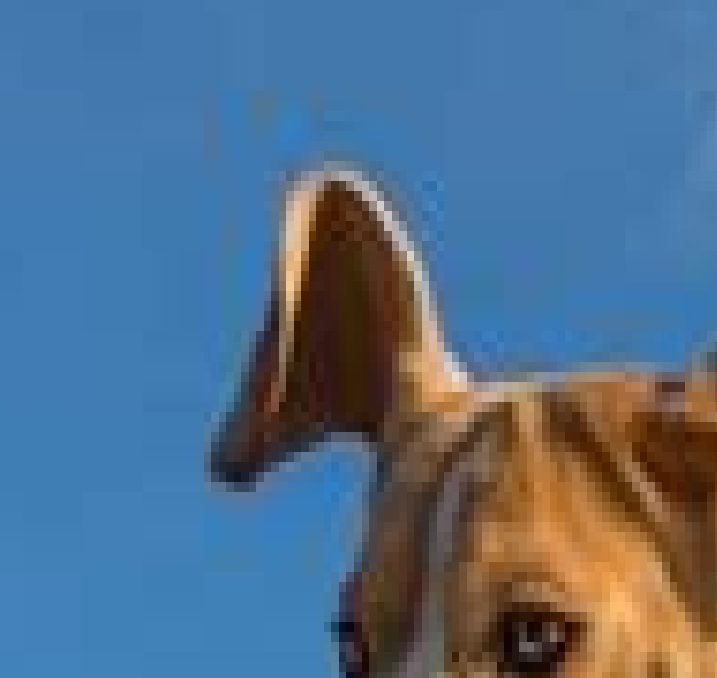

In [110]:
samples = map(c->xy2p(c), renorm(cords))
map(s->picXY(s), samples)